About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information

1) age

2) sex

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6)fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11)the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
pip install colorama


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install git+https://github.com/amueller/dabl/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/amueller/dabl/ to /tmp/pip-req-build-zr5gytby
  Running command git clone -q https://github.com/amueller/dabl/ /tmp/pip-req-build-zr5gytby
  Created wheel for dabl: filename=dabl-0.2.1.dev0-py3-none-any.whl size=559027 sha256=6b0a76893e5305e6c27a196e714e2b7d6203fe1cdd4449cae84db96fa2ef6a50
  Stored in directory: /tmp/pip-ephem-wheel-cache-pt9fre8q/wheels/13/7c/ae/d97113019b4ee03d3d3dc751f9d6dc09bca855e3ebdabcf81b
Successfully built dabl


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from colorama import Fore, Style

import dabl

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.8/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
path = '/content/heart.csv'


In [ ]:
df = pd.read_csv(path)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#small function to print the summary statistics
def statistics(dataframe, column):
    cout(f"The Average value in {column} is: {dataframe[column].mean():.2f}", Fore.RED)
    cout(f"The Maximum value in {column} is: {dataframe[column].max()}", Fore.BLUE)
    cout(f"The Minimum value in {column} is: {dataframe[column].min()}", Fore.YELLOW)
    cout(f"The 25th Quantile of {column} is: {dataframe[column].quantile(0.25)}", Fore.GREEN)
    cout(f"The 50th Quantile of {column} is: {dataframe[column].quantile(0.50)}", Fore.CYAN)
    cout(f"The 75th Quantile of {column} is: {dataframe[column].quantile(0.75)}", Fore.MAGENTA)

In [ ]:
#checking for any nullvalues

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:

def cout(string: str, color=Fore.RED):
    """
    Saves some work 😅
    """
    print(color+string+Style.RESET_ALL)

In [ ]:
#summary statistics from age

statistics(df,'age')

The Average value in age is: 54.37
The Maximum value in age is: 77
The Minimum value in age is: 29
The 25th Quantile of age is: 47.5
The 50th Quantile of age is: 55.0
The 75th Quantile of age is: 61.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 956 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 963 missing from current font.
  font.set_text(s, 0.0, flags=flags)


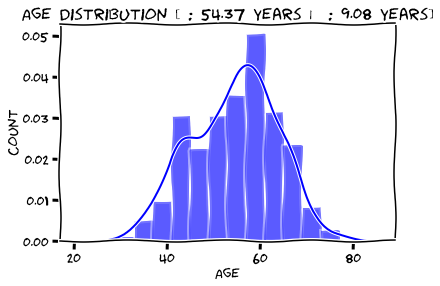

In [ ]:
# Let's plot the age column too
# Let's plot the age column too
plt.xkcd()
sns.distplot(df['age'], color='blue')
plt.title(f"Age Distribution [\u03BC : {df['age'].mean():.2f} years | \u03C3 : {df['age'].std():.2f} years]")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


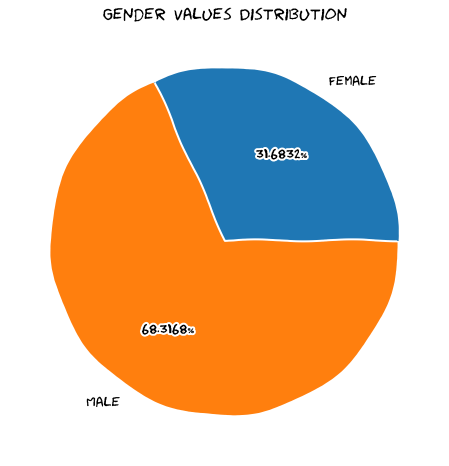

In [ ]:
# Pie Chart
plt.xkcd()
plt.figure(figsize=(10, 8))
target = [len(df[df['sex'] == 0]), len(df[df['sex'] == 1])]
labels = ["Female", "Male"]
plt.pie(x=target, labels=labels, autopct='%1.4f%%')
plt.title("Gender Values Distribution")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


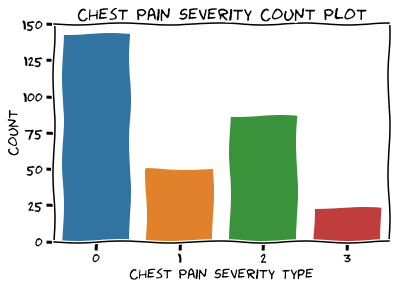

In [ ]:
#checking the severity
plt.xkcd()
sns.countplot(df['cp'])
plt.xlabel("Chest Pain Severity Type")
plt.ylabel("Count")
plt.title("Chest Pain Severity Count Plot")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 956 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 963 missing from current font.
  font.set_text(s, 0.0, flags=flags)


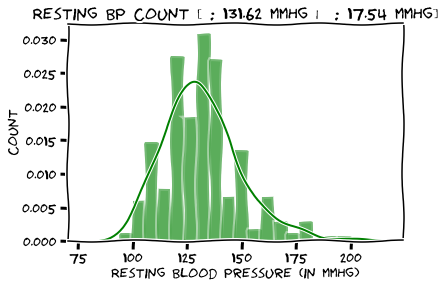

In [ ]:
# Dist plot of Resting Blood Pressure
plt.xkcd()
sns.distplot(df['trestbps'], color='green')
plt.title(f"Resting BP Count [\u03BC : {df['trestbps'].mean():.2f} mmHg | \u03C3 : {df['trestbps'].std():.2f} mmHg]")
plt.xlabel("Resting Blood Pressure (in mmHg)")
plt.ylabel("Count")
plt.show()

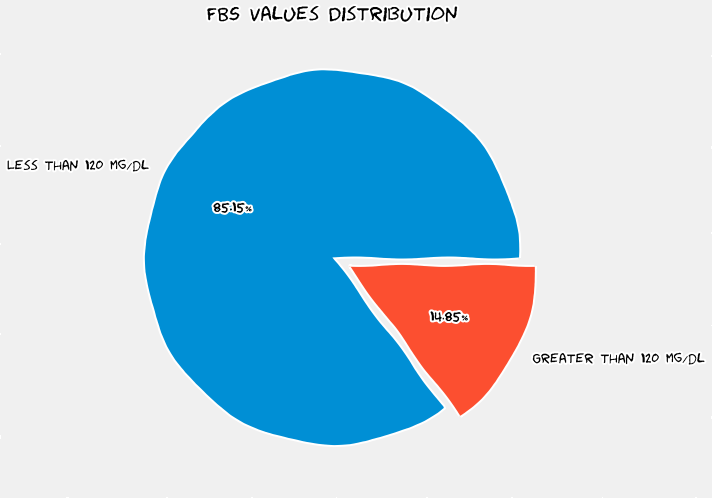

In [ ]:
# Pie Chart

#if fasting blood sugar is greater than 120mg/dl, then it is 1 or else then it is 0

plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 8))
target = [len(df[df['fbs'] == 0]), len(df[df['fbs'] == 1])]
labels = ["Less than 120 mg/dl", "Greater than 120 mg/dl"]
plt.pie(x=target, labels=labels, autopct='%1.2f%%', explode=[0, 0.1])
plt.title("FBS Values Distribution")
plt.show()